In [ ]:
# FRAUD DETECTION 

In [ ]:
#IMPORTING LIBRARIES

In [ ]:
# PANDAS FOR NUMERICAL OPERATIONS AND NUMPY FOR MANIPULATING DATAFRAMES
import pandas as pd
import numpy as np

# VISUASLIZATION MODULES
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# PREPROCESSING LIBRARIES
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML LIBRARIES
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



# PERFORMANCE EVALUTATION FOR MODELS
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score





In [ ]:
#DATA ANALYSIS AND VISUALIZATION

In [ ]:
from sklearn import datasets

In [ ]:
#data = pd.read_csv(r"C:\Users\91822\Downloads\Fraud.csv")
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Fraud.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DISPLAYING THE FIRST 5 INSTANCES
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# DISPLAYING LAST 5 INSTANCES
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
# TOTAL INSTANCES AND FEATUES
data.shape

(6362620, 11)

In [ ]:
# INFORMATION ABOUT THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#STANARD STATISTICAL MEASURES FOR THE DATA
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# CHECKING FOR NULL VALUES IF ANY
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# EVERY INSTANCE OF 'TYPE' FEATURE
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:

data['isFraud'].value_counts() 

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
fraud = data.loc[data['isFraud'] == 1]
normal = data.loc[data['isFraud'] == 0]

In [ ]:
len(fraud)

8213

In [ ]:
normal = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

In [ ]:
print(normal.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [ ]:
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [ ]:
#'TYPE'  FEATURE WITH FRAUD VALUES

data_Fraud_Cash_Out = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]
data_Fraud_Payment = data.loc[(data.isFraud == 1) & (data.type == 'PAYMENT')]
data_Fraud_Cash_in = data.loc[(data.isFraud == 1) & (data.type == 'CASH_IN')]
data_Fraud_Transfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
data_Fraud_Debit = data.loc[(data.isFraud == 1) & (data.type == 'DEBIT')]

In [ ]:
print(len(data_Fraud_Cash_Out))
print(len(data_Fraud_Payment))
print(len(data_Fraud_Cash_in))
print(len(data_Fraud_Transfer))
print(len(data_Fraud_Debit))

4116
0
0
4097
0


In [ ]:
#SAMPLING DATA

In [ ]:
# WE HAVE THIS HUGE DATASET WHICH IS UNBALANCED, WHICH CAN CAUSE HUGE CLASSSIFICATION MISTAKES, WE USED RANDOM SAMPLING TO TAKE SAMPLES FROM THE DATA RANDOMLY AND BALANCE THE DATASET

In [ ]:
normal_sample = normal.sample(n=8213)

In [ ]:
new_data = pd.concat([normal_sample, fraud], axis=0)

In [ ]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1976172,178,CASH_OUT,1395.68,C1089637918,0.0,0.00,C377367680,1418868.55,1305681.70,0,0
5579797,393,PAYMENT,20085.15,C1521265769,0.0,0.00,M1669704539,0.00,0.00,0,0
5261085,372,CASH_OUT,71576.47,C220449405,108.0,0.00,C610479488,1194875.35,1266451.82,0,0
5560716,384,PAYMENT,11192.03,C7975361,0.0,0.00,M1119073219,0.00,0.00,0,0
3127929,236,DEBIT,2139.87,C106349346,315760.0,313620.13,C1900042549,194160.34,196300.20,0,0


In [ ]:
new_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
new_data['isFraud'].value_counts() 

0    8213
1    8213
Name: isFraud, dtype: int64

In [ ]:
new_data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.589310,1.669657e+05,7.779758e+05,800522.245623,1.062501e+06,1.176925e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [ ]:
# REPLACING CHARACTER 'C' AND 'M' FROM THE FEATURES

In [ ]:
new_data['nameOrig'] = new_data['nameOrig'].replace({'C': ''}, regex=True)

In [ ]:
new_data['nameDest'] = new_data['nameDest'].replace({'C': ''}, regex=True)

In [ ]:
new_data['nameDest'] = new_data['nameDest'].replace({'M': ''}, regex=True)
new_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1976172,178,CASH_OUT,1395.68,1089637918,0.00,0.00,377367680,1418868.55,1305681.70,0,0
5579797,393,PAYMENT,20085.15,1521265769,0.00,0.00,1669704539,0.00,0.00,0,0
5261085,372,CASH_OUT,71576.47,220449405,108.00,0.00,610479488,1194875.35,1266451.82,0,0
5560716,384,PAYMENT,11192.03,7975361,0.00,0.00,1119073219,0.00,0.00,0,0
3127929,236,DEBIT,2139.87,106349346,315760.00,313620.13,1900042549,194160.34,196300.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,786484425,339682.13,0.00,776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,1529008245,6311409.28,0.00,1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,1162922333,6311409.28,0.00,1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,1685995037,850002.52,0.00,2080388513,0.00,0.00,1,0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 1976172 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
new_data['nameDest'] = pd.to_numeric(new_data['nameDest'])
new_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1976172,178,CASH_OUT,1395.68,1089637918,0.00,0.00,377367680,1418868.55,1305681.70,0,0
5579797,393,PAYMENT,20085.15,1521265769,0.00,0.00,1669704539,0.00,0.00,0,0
5261085,372,CASH_OUT,71576.47,220449405,108.00,0.00,610479488,1194875.35,1266451.82,0,0
5560716,384,PAYMENT,11192.03,7975361,0.00,0.00,1119073219,0.00,0.00,0,0
3127929,236,DEBIT,2139.87,106349346,315760.00,313620.13,1900042549,194160.34,196300.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,786484425,339682.13,0.00,776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,1529008245,6311409.28,0.00,1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,1162922333,6311409.28,0.00,1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,1685995037,850002.52,0.00,2080388513,0.00,0.00,1,0


In [ ]:
new_data['nameOrig'] = pd.to_numeric(new_data['nameOrig'])
new_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1976172,178,CASH_OUT,1395.68,1089637918,0.00,0.00,377367680,1418868.55,1305681.70,0,0
5579797,393,PAYMENT,20085.15,1521265769,0.00,0.00,1669704539,0.00,0.00,0,0
5261085,372,CASH_OUT,71576.47,220449405,108.00,0.00,610479488,1194875.35,1266451.82,0,0
5560716,384,PAYMENT,11192.03,7975361,0.00,0.00,1119073219,0.00,0.00,0,0
3127929,236,DEBIT,2139.87,106349346,315760.00,313620.13,1900042549,194160.34,196300.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,786484425,339682.13,0.00,776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,1529008245,6311409.28,0.00,1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,1162922333,6311409.28,0.00,1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,1685995037,850002.52,0.00,2080388513,0.00,0.00,1,0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 1976172 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  int64  
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  int64  
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 1.5+ MB


In [ ]:
# LABELCODING FOR CONVERTING OF CATEGORICAL DATA INTO NUMERICAL FORMAT

le = LabelEncoder()
label = le.fit_transform(new_data['type'])
label

new_data.insert(2,'type_num', label)


new_data.type_num.unique()



array([1, 3, 2, 0, 4])

In [ ]:
#DROPPING UNNECESSARY COLUMNS ON THE BASIS OF CORRELATION

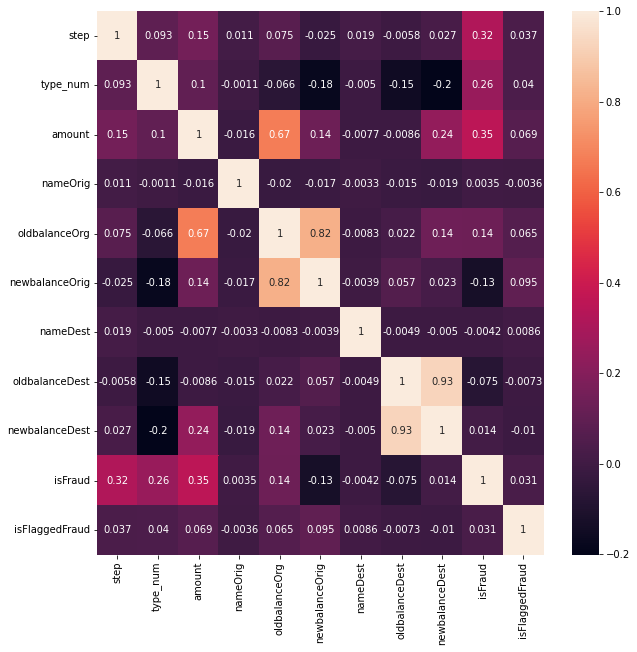

In [ ]:
corrmap = new_data.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(10,10))
g=sns.heatmap(new_data[top_corr_features].corr(),annot=True)

In [ ]:
nd= new_data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
nd = nd.reset_index(drop=True)



In [ ]:
#SPLITTING THE DATA INTO FEATURES AND TARGETS

In [ ]:
X = nd.drop(["isFraud","type"],axis=1)
Y = new_data['isFraud']

In [ ]:
print(X)

       step  type_num      amount  oldbalanceOrg  newbalanceOrig  \
0       178         1     1395.68           0.00            0.00   
1       393         3    20085.15           0.00            0.00   
2       372         1    71576.47         108.00            0.00   
3       384         3    11192.03           0.00            0.00   
4       236         2     2139.87      315760.00       313620.13   
...     ...       ...         ...            ...             ...   
16421   743         1   339682.13      339682.13            0.00   
16422   743         4  6311409.28     6311409.28            0.00   
16423   743         1  6311409.28     6311409.28            0.00   
16424   743         4   850002.52      850002.52            0.00   
16425   743         1   850002.52      850002.52            0.00   

       oldbalanceDest  newbalanceDest  
0          1418868.55      1305681.70  
1                0.00            0.00  
2          1194875.35      1266451.82  
3                0.00  

In [ ]:
print(Y)

1976172    0
5579797    0
5261085    0
5560716    0
3127929    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: int64


In [ ]:
#TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=111)

In [ ]:
#SCALING DATA

In [ ]:
ss=StandardScaler()

In [ ]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
#LOGISTIC REGRESSION

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
list1=lr.predict(X_test)

In [ ]:
accuracy_score(y_test,list1)

0.8950572193815437

In [ ]:
print(classification_report(y_test,list1))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2041
           1       0.96      0.82      0.89      2066

    accuracy                           0.90      4107
   macro avg       0.90      0.90      0.89      4107
weighted avg       0.90      0.90      0.89      4107



In [ ]:
#DECISION TREE CLASSIFIER

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
list2=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,list2)

0.7755052349646945

In [ ]:
print(classification_report(y_test,list2))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81      2041
           1       0.99      0.56      0.72      2066

    accuracy                           0.78      4107
   macro avg       0.84      0.78      0.77      4107
weighted avg       0.84      0.78      0.76      4107



In [ ]:
#SUPPORT VECTOR MACHINE

In [ ]:
svm=SVC(kernel='linear')

In [ ]:
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
list3=svm.predict(X_test)

In [ ]:
accuracy_score(y_test,list3)

0.8914049184319455

In [ ]:
print(classification_report(y_test,list3))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2041
           1       0.97      0.81      0.88      2066

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [ ]:
#NAIVE BAYES

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
list4=nb.predict(X_test)

In [ ]:
accuracy_score(y_test,list4)

0.7350864377891405

In [ ]:
print(classification_report(y_test,list4))


              precision    recall  f1-score   support

           0       0.66      0.96      0.78      2041
           1       0.92      0.52      0.66      2066

    accuracy                           0.74      4107
   macro avg       0.79      0.74      0.72      4107
weighted avg       0.79      0.74      0.72      4107



In [ ]:
#RANDOM FOREST CLASSIFIER

In [ ]:
rf=RandomForestClassifier( n_estimators = 100)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
list5=rf.predict(X_test)

In [ ]:
accuracy_score(y_test,list5)

0.793036279522766

In [ ]:
print(classification_report(y_test,list5))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2041
           1       1.00      0.59      0.74      2066

    accuracy                           0.79      4107
   macro avg       0.85      0.79      0.78      4107
weighted avg       0.85      0.79      0.78      4107



In [ ]:
#HYPERPARAMETER OPTIMIZATION

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C':[1,10,20],
            'kernel':['linear','rbf']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10]
        }
    },
    'gaussian_nb': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0,-9, num=100)
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random']
        }
    }
}


In [ ]:
model_name=[]
scores=[]
for model , mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
        'model':model,
      'best_score' : clf.best_score_,
      'best_params' :clf.best_params_
  })

In [ ]:
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

,model,best_score,best_params
0,svm,0.951782,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.990421,{'n_estimators': 10}
2,logistic_regression,0.910788,{'C': 10}
3,gaussian_nb,0.736260,{'var_smoothing': 0.0001}
4,decision_tree,0.991801,"{'criterion': 'entropy', 'splitter': 'best'}"
